In [30]:
from google.colab import files
uploaded = files.upload()

Saving Day 20_E-Commerce_Data.csv to Day 20_E-Commerce_Data (1).csv


In [31]:
import pandas as pd
df = pd.read_csv('Day 20_E-Commerce_Data.csv')

In [33]:
# Identify missing values
print(df.isna().sum())
# Example: Fill missing values in Customer_Age with mean value
df['Customer_Age'].fillna(df['Customer_Age'].mean(), inplace=True)


Order_ID             0
Product_Category    24
Product_Price       20
Customer_Age         0
Rating              25
Review_Text         21
Order_Date          10
dtype: int64


<ipython-input-33-a7628358cb00>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Customer_Age'].fillna(df['Customer_Age'].mean(), inplace=True)


In [34]:
# Find duplicated reviews
duplicates = df[df.duplicated(subset='Review_Text')]
print(duplicates)
# Remove duplicate records
df.drop_duplicates(subset='Review_Text', keep='first', inplace=True)


     Order_ID Product_Category  Product_Price  Customer_Age  Rating  \
3           4            Books         4568.0     35.000000     3.0   
6           7       Home Decor          130.0     67.000000     3.0   
7           8         Clothing         1905.0     42.144898     1.0   
8           9            Books         3669.0     32.000000     4.0   
9          10      Electronics         1536.0     47.000000     4.0   
..        ...              ...            ...           ...     ...   
500        46       Home Decor         2965.0     41.000000     4.0   
501       109       Home Decor          384.0     56.000000     1.0   
502        52      Electronics         2434.0     26.000000     3.0   
503       281       Home Decor         3093.0     24.000000     3.0   
504       461      Electronics         1970.0     55.000000     1.0   

             Review_Text  Order_Date  
3        Value for money  2023-01-04  
6     Excellent product!  2023-01-07  
7        Value for money  2023

In [35]:
# Standardize ratings
df['Rating'] = df['Rating'].clip(1, 5)
# Correct spelling inconsistencies (example)
df['Product_Category'] = df['Product_Category'].str.lower()
df['Product_Category'] = df['Product_Category'].replace({'electrnics': 'electronics', 'clohting': 'clothing'})


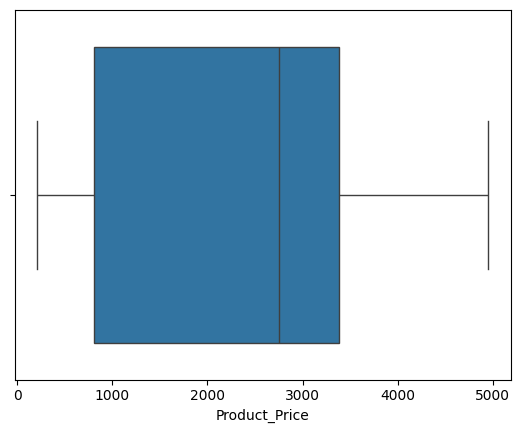

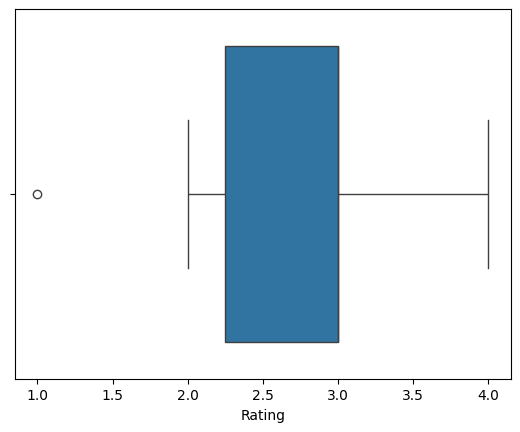

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for Product_Price
sns.boxplot(x=df['Product_Price'])
plt.show()

# Boxplot for Rating
sns.boxplot(x=df['Rating'])
plt.show()


In [37]:
# Convert categorical data into numerical format (example)
df = pd.get_dummies(df, columns=['Product_Category'])

In [38]:
# Save the cleaned dataset
df.to_csv('cleaned_dataset.csv', index=False)
